# Beispiel Stabilität FTCS Scheme

**F**orward **T**ime **C**entered **S**pace

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Anfangsbedingung

In [2]:
def phi(x):
    inda = x<np.pi/2
    indb = x>=np.pi/2
    return np.array(x[inda].tolist()+(np.pi-x[indb]).tolist())

Analytische Lösung

In [3]:
def analyticSolution(t, x, m = 3):
    y = np.zeros_like(x)
    for k in range(1,m,2):
        y += 4*(-1)**((k-1)/2)/(np.pi*k**2)*np.sin(k*x)*np.exp(-k**2*t)
    return y

Zerlegung des Intervalls $[0,\pi]$

In [4]:
J = 20
x = np.linspace(0,np.pi,J+1)

FTCS-Scheme

In [5]:
def explizitFTCSSchema(u0, K , s):
    usol = [u0]
    uold = np.array(u0)
    for k in range(K):
        unew = np.zeros_like(u0)
        for j in range(1,u0.shape[0]-1):
            unew[j] = s*(uold[j+1]+uold[j-1])+(1-2*s)*uold[j]
        usol.append(unew)
        uold = unew
    return usol

In [6]:
u0 = phi(x)

Erste Version

In [7]:
s1 = 5/11
dt1 = s1*(np.pi/J)**2
usol1 = explizitFTCSSchema(u0, 21, s1)
print(s1, dt1)

0.45454545454545453 0.01121545954669245


Zweite Version

In [8]:
s2 = 5/9
dt2 = s2*(np.pi/J)**2
usol2 = explizitFTCSSchema(u0, 21, s2)
print(s2, dt2)

0.5555555555555556 0.013707783890401885


Vergleich

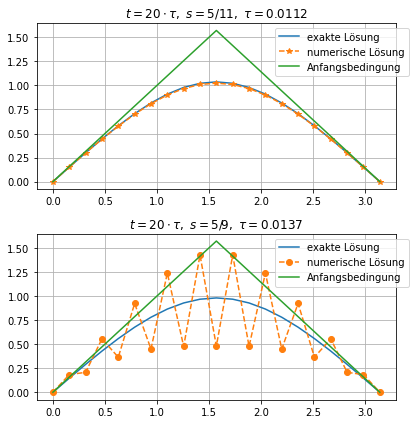

In [9]:
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
plt.plot(x,analyticSolution(20*dt1, x, m=20),label='exakte Lösung')
plt.plot(x,usol1[-1],'*--',label='numerische Lösung')
plt.plot(x,phi(x),label='Anfangsbedingung')
plt.grid()
plt.legend(bbox_to_anchor=(.65,1))
plt.title(r'$t = 20\cdot \tau,\ s=5/11,\ \tau = $'+str(np.round(dt1,4)))
plt.subplot(2,1,2)
plt.plot(x,analyticSolution(20*dt2, x, m=20),label='exakte Lösung')
plt.plot(x,usol2[-1],'o--',label='numerische Lösung')
plt.plot(x,phi(x),label='Anfangsbedingung')
plt.grid()
plt.title(r'$t = 20\cdot \tau,\ s=5/9,\ \tau = $'+str(np.round(dt2,4)))
plt.legend(bbox_to_anchor=(.65,1))
plt.tight_layout()
#plt.savefig('BeispielFTCSScheme.pdf')
plt.show()